# K-means clustering

## import packages

In [1]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import pylab as pl

## import dataset

In [2]:
#from the scikit library we import a simple dataset with some data about three types of iris flowers:
#iris-Setosa, iris-versicolour, iris-virginica
#the data is stored as a bunch!
dataset = load_iris()

#Retrieve only the data part and convert it to a dataframe
X = pd.DataFrame(dataset.data)

#The dataset does not contain headers, so we'll add those
X.columns = ['sepal length', 'sepal width', 'petal length', 'petal width']

#Create the set with the targets
y = dataset.target

#print the first 5 rows
print(X.head())

   sepal length  sepal width  petal length  petal width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2


## Plot with known labels

Here we want to take a look at the three types in a 2-dimensional plot. To do so we need to reduce the dimension of X (from 4 to 2). This is done by using principal component analysis. Afterwards a scatter plot is made.

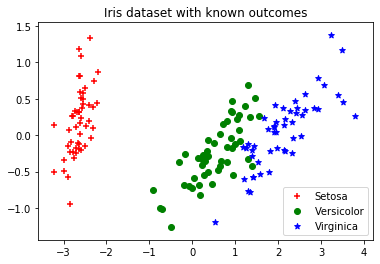

In [3]:
#use PCA to reduce the dimension of X to 2
pca = PCA(n_components = 2).fit(X)
pca_2d = pca.transform(X)

for i in range(0, pca_2d.shape[0]):
    if y[i] == 0:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r', marker='+')
    elif y[i] == 1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g', marker='o')
    elif y[i] == 2:
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b', marker='*')
        
pl.legend([c1, c2, c3], ['Setosa', 'Versicolor','Virginica'])
pl.title('Iris dataset with known outcomes')
pl.show()

## K-means clustering

Here we use the K-means clustering technique to define n=3 cluster centroids. We extract the labels given by the algorithm and use these to create a scatterplot similar to the one above.

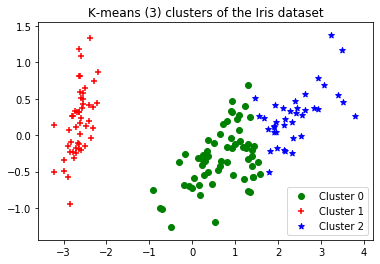

In [4]:
#There are three types of iris flowers in the dataset, so lets go with n_clusters = 3
kmeans = KMeans(n_clusters=3, random_state = 0).fit(X)
labels = kmeans.labels_

for i in range(0, pca_2d.shape[0]):
    if kmeans.labels_[i] == 0:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g', marker='o')
    elif kmeans.labels_[i] == 1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r', marker='+')
    elif kmeans.labels_[i] == 2:
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b', marker='*')
        
pl.legend([c1, c2, c3],['Cluster 0', 'Cluster 1', 'Cluster 2'])
pl.title('K-means (3) clusters of the Iris dataset')
pl.show()


# Making predictions

Should you get new data entries you can use the .predict method to determine which cluster centroid is closest

In [5]:
#new observations
new_data = pd.DataFrame([[1,1,1,1],[4,4,4,4]])

#determine which cluster centroid is closest
prediction = kmeans.predict(new_data)

print(prediction)

[1 0]
